1.创建环境并初始化Q表

In [10]:
import numpy as np
import random
import gym

Num = 10
rate = 0.5
factor = 0.9

p_bound = np.linspace(-2.4,2.4,Num - 1)
v_bound = np.linspace(-3,3,Num - 1)
ang_bound = np.linspace(-0.5,0.5,Num - 1)
angv_bound = np.linspace(-2.0,2.0,Num - 1)

def state_dig(state):
    p,v,ang,angv = state
    digital_state=  (np.digitize(p, p_bound),
                    np.digitize(v, v_bound),
                    np.digitize(ang, ang_bound),
                    np.digitize(angv, angv_bound))
    return tuple(min(i,Num-1) for i in digital_state)
env = gym.make('CartPole-v1')
q_table = np.zeros((Num,Num,Num,Num,env.action_space.n))

训练Q-learning 算法

In [4]:
for i in range(3000):
    state,_ = env.reset() #获取初始状态
    digital_state = state_dig(state) #离散化状态

    step = 0
    while True:
        epsi = 1.0 / (i+1) #epsilon衰减，探索逐渐减少
        if random.random() < epsi:
            action = random.randrange(env.action_space.n)
        else:
            action = np.argmax(q_table[digital_state]) #选择Q值最大的动作
        
        next_state, reward, done, _,_= env.step(action) #执行动作，获取奖励和下一个状态
        next_digital_state = state_dig(next_state) #离散化下一个状态

        if done:
            reward = 1 if step >= 400 else -1
        else:
            reward = 0
        #Q值更新
        current_q = q_table[digital_state][action]
        q_table[digital_state][action] += rate * (reward + factor * max(q_table[next_digital_state]) - current_q)
        digital_state = next_digital_state
        step += 1
        if done:
            print(f"Episode {i+1}: Steps = {step}")
            break
        

Episode 1: Steps = 27
Episode 2: Steps = 15
Episode 3: Steps = 12
Episode 4: Steps = 12
Episode 5: Steps = 17
Episode 6: Steps = 15
Episode 7: Steps = 11
Episode 8: Steps = 9
Episode 9: Steps = 9
Episode 10: Steps = 13
Episode 11: Steps = 10
Episode 12: Steps = 22
Episode 13: Steps = 21
Episode 14: Steps = 18
Episode 15: Steps = 15
Episode 16: Steps = 38
Episode 17: Steps = 9
Episode 18: Steps = 37
Episode 19: Steps = 24
Episode 20: Steps = 44
Episode 21: Steps = 53
Episode 22: Steps = 103
Episode 23: Steps = 140
Episode 24: Steps = 77
Episode 25: Steps = 90
Episode 26: Steps = 142
Episode 27: Steps = 115
Episode 28: Steps = 81
Episode 29: Steps = 134
Episode 30: Steps = 137
Episode 31: Steps = 87
Episode 32: Steps = 75
Episode 33: Steps = 138
Episode 34: Steps = 197
Episode 35: Steps = 146
Episode 36: Steps = 221
Episode 37: Steps = 190
Episode 38: Steps = 182
Episode 39: Steps = 80
Episode 40: Steps = 262
Episode 41: Steps = 164
Episode 42: Steps = 98
Episode 43: Steps = 133
Episode 

可视化训练

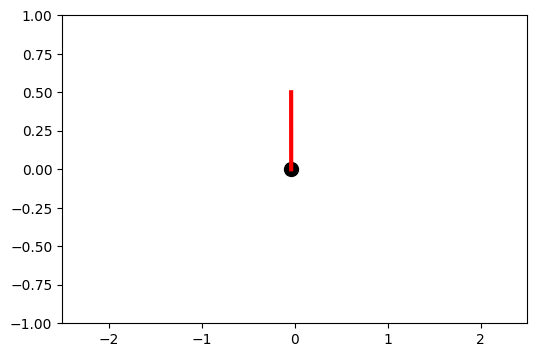

In [17]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def animate_cartpole(env, q_table, frames_per_episode=400):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-1, 1)

    state, _ = env.reset()
    digital_state = state_dig(state)

    cart, = ax.plot([], [], 'ko', ms=10)
    pole, = ax.plot([], [], 'r-', lw=3)

    def update(frame):
        nonlocal digital_state

        next_state, reward, done, _, _ = env.step(action)
        digital_state = state_dig(next_state)

        cart_pos = float(env.state[0])
        pole_angle = float(env.state[2])

        cart.set_data([cart_pos], [0])
        pole.set_data(
            [cart_pos, cart_pos + np.sin(pole_angle) * 0.5],
            [0, np.cos(pole_angle) * 0.5]
        )
        return cart, pole

    ani = animation.FuncAnimation(fig, update, frames=frames_per_episode, interval=50, blit=True, repeat=False)
    plt.show()

# 示例调用前应先完成 env 和 q_table 的初始化
animate_cartpole(env, q_table)